# PROBLEM 2
Pasożytnictwo cieplne

In [1]:
import sys
from pathlib import Path

NOTEBOOK_DIR = Path().resolve()
PROJECT_ROOT = NOTEBOOK_DIR.parent
PIPELINE_DIR = PROJECT_ROOT / "pipeline"

print("Notebook:", NOTEBOOK_DIR)
print("Project root:", PROJECT_ROOT)
print("Pipeline dir:", PIPELINE_DIR)

sys.path.insert(0, str(PIPELINE_DIR))
print("Added pipeline to sys.path")

Notebook: C:\Users\kalic\PycharmProjects\modelowanie-projekt\notebooks
Project root: C:\Users\kalic\PycharmProjects\modelowanie-projekt
Pipeline dir: C:\Users\kalic\PycharmProjects\modelowanie-projekt\pipeline
Added pipeline to sys.path


In [2]:
from pipeline.MultiRoomSim import *
from pipeline.Visualizations import *

Opis: Inicjalizujemy potrzebną klasę Visualizer

In [3]:
viz = Visualizer()

Opis: Tworzymy trzy scenariusze
1. Wszyscy grzeją
2. Środkowy nie grzeje
3. Tylko środkowy grzeje

In [4]:
print("Symulacja 1/3: Wszyscy grzeją...")
sim_all = MultiRoomSimulation()
sim_all.set_scenario(True, True, True)
sim_all.run()

print("Symulacja 2/3: Środkowy nie grzeje...")
sim_par = MultiRoomSimulation()
sim_par.set_scenario(True, False, True)
sim_par.run()

print("Symulacja 3/3: Tylko środkowy grzeje...")
sim_mid = MultiRoomSimulation()
sim_mid.set_scenario(False, True, False)
sim_mid.run()

sims = [sim_all, sim_par, sim_mid]
titles = [
    "Wszyscy grzeją",
    "Środkowy nie grzeje",
    "Tylko środkowy grzeje"
]

Symulacja 1/3: Wszyscy grzeją...


Symulacja: 100%|██████████| 21600/21600 [02:08<00:00, 167.46it/s]


Symulacja 2/3: Środkowy nie grzeje...


Symulacja: 100%|██████████| 21600/21600 [01:57<00:00, 183.26it/s]


Symulacja 3/3: Tylko środkowy grzeje...


Symulacja: 100%|██████████| 21600/21600 [01:48<00:00, 199.61it/s]


Opis: Wyświetlamy heatmapy i statystyki dla każdego scenariusza

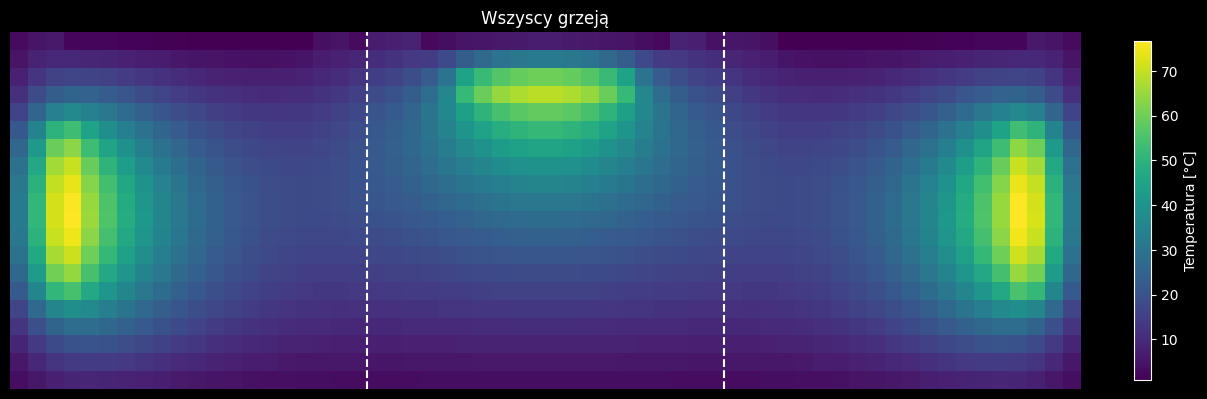

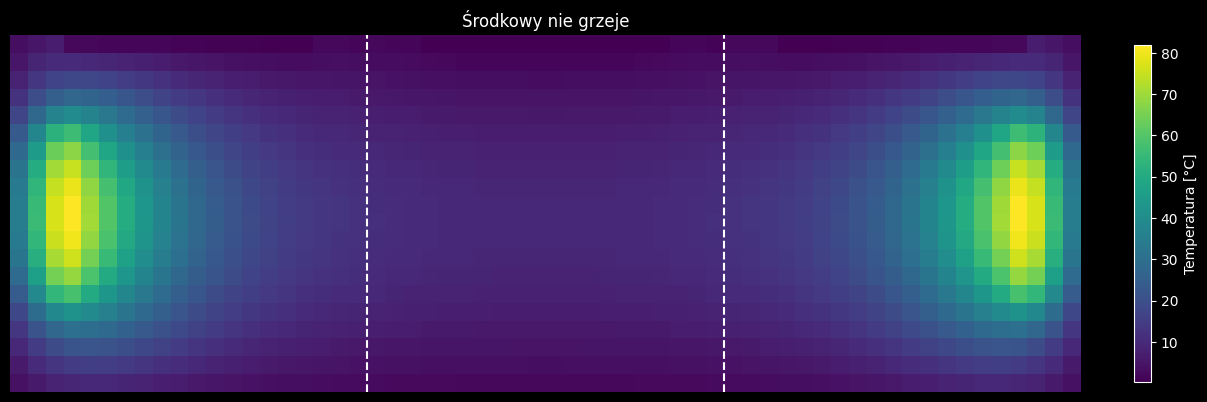

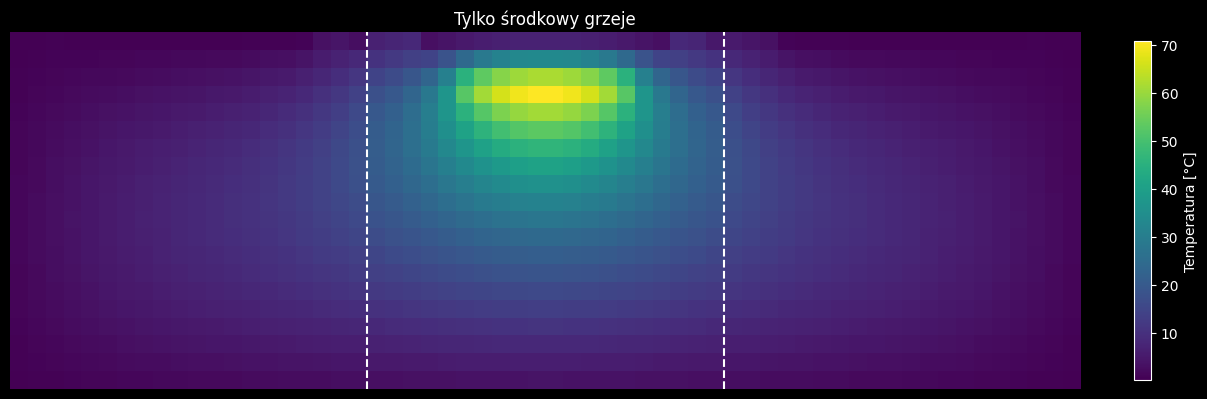


STATYSTYKI: Wszyscy grzeją
Pokój        | Średnia  | Max      | Min      | Std      | Energia [kJ]
----------------------------------------------------------------------
Lewy         |   22.11°C |   76.51°C |    0.88°C |   16.49 |     178.01
Środkowy     |   22.18°C |   68.81°C |    2.92°C |   14.49 |     191.12
Prawy        |   22.12°C |   76.71°C |    0.88°C |   16.51 |     178.00

STATYSTYKI: Środkowy nie grzeje
Pokój        | Średnia  | Max      | Min      | Std      | Energia [kJ]
----------------------------------------------------------------------
Lewy         |   22.03°C |   81.77°C |    0.65°C |   18.41 |     186.97
Środkowy     |    6.71°C |   11.29°C |    0.38°C |    2.89 |       0.00
Prawy        |   22.03°C |   81.80°C |    0.65°C |   18.41 |     186.96

STATYSTYKI: Tylko środkowy grzeje
Pokój        | Średnia  | Max      | Min      | Std      | Energia [kJ]
----------------------------------------------------------------------
Lewy         |    5.63°C |   17.59°C |    0

In [5]:
# Heatmapy
viz.plot_three_room_heatmaps(sims, titles)

# Statystyki
for sim, title in zip(sims, titles):
    viz.print_statistics(sim, title)

Opis: Tworzymy podsumowanie średnich temperatur i zużycia energii w każdym scenariuszu

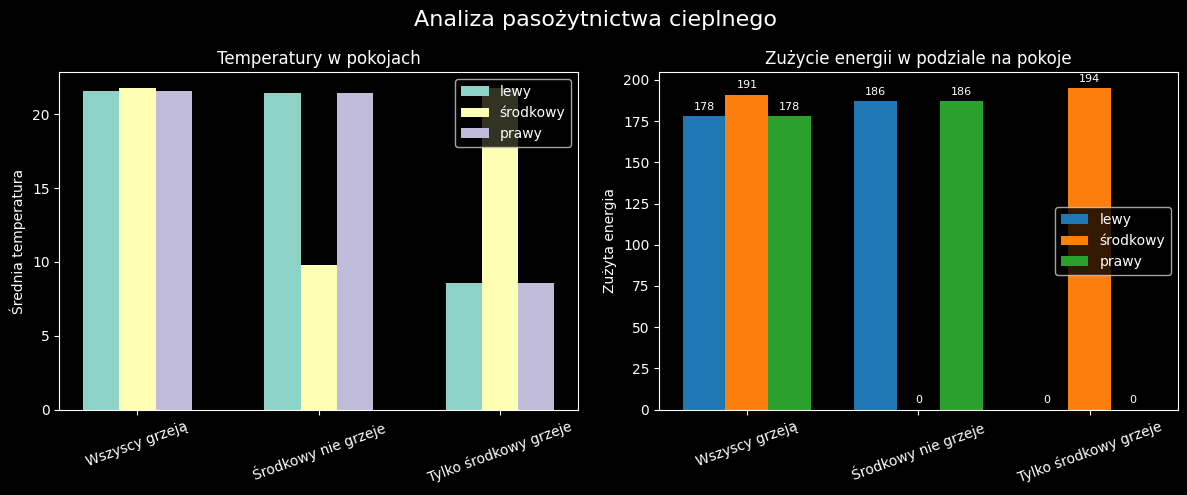

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

#średnie temperatury
avg_temps = []
for sim in sims:
    L_mean = np.mean(sim.temp_history['L'])
    M_mean = np.mean(sim.temp_history['M'])
    R_mean = np.mean(sim.temp_history['R'])
    avg_temps.append([L_mean, M_mean, R_mean])

avg_temps = np.array(avg_temps)
width = 0.2
x = np.arange(len(titles))

axes[0].bar(x - width, avg_temps[:,0], width, label="lewy")
axes[0].bar(x, avg_temps[:,1], width, label="środkowy")
axes[0].bar(x + width, avg_temps[:,2], width, label="prawy")

axes[0].set_xticks(x)
axes[0].set_xticklabels(titles, rotation=20)
axes[0].set_ylabel("Średnia temperatura")
axes[0].set_title("Temperatury w pokojach")
axes[0].legend()

# zużycie energii w każdym ze scenariuszy
rooms = ['L', 'M', 'R']
labels = ['lewy', 'środkowy', 'prawy']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

x = np.arange(len(sims))  #pozycje scenariuszy
width = 0.25  #szerokość pojedynczego słupka

for i, room in enumerate(rooms):
    room_energies = [sim.energy[room] for sim in sims]

    offset = (i - 1) * width
    rects = axes[1].bar(x + offset, room_energies, width, label=labels[i], color=colors[i])

    #etykiety tekstowe nad słupkami
    for rect in rects:
        height = rect.get_height()
        axes[1].annotate(f'{int(height)}',
                         xy=(rect.get_x() + rect.get_width() / 2, height),
                         xytext=(0, 3),
                         textcoords="offset points",
                         ha='center', va='bottom', fontsize=8)

axes[1].set_ylabel('Zużyta energia')
axes[1].set_title('Zużycie energii w podziale na pokoje')
axes[1].set_xticks(x)
axes[1].set_xticklabels(titles, rotation=20)
axes[1].legend()

fig.suptitle("Analiza pasożytnictwa cieplnego", fontsize=16)
plt.tight_layout()
plt.show()